In [99]:
import numpy as np

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(5)
sns.set()

In [100]:
N = 9
N_train = 7

x_max = 1.8

X = np.linspace(0, x_max, N)
Y_true = np.sin(2 * np.pi * X)
Y = Y_true + np.random.randn(N) * 0.1

perm = np.random.permutation(N)
train_inds = np.sort(perm[:N_train])
test_inds = np.sort(perm[N_train:])

X_train, Y_train = X[train_inds], Y[train_inds]
X_test, Y_test = X[test_inds], Y[test_inds]

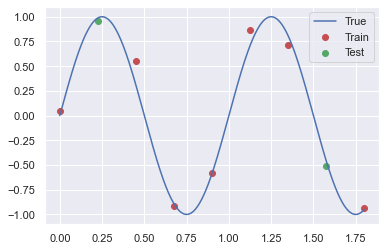

In [101]:
plt.plot(np.linspace(0, x_max, 1000), np.sin(2 * np.pi * np.linspace(0, x_max, 1000)), c='b', label='True')
plt.scatter(X_train, Y_train, c='r', label='Train')
plt.scatter(X_test, Y_test, c='g', label='Test')
plt.legend()
plt.show()

In [102]:
def print_loss(X, Y, w, b, reg_coef, mode):
    MSE = np.square(X @ w + b - Y.reshape(-1, 1)).mean()
    R = reg_coef * float(w.T @ w) / X.shape[0]
    print(f"{mode} MSE: {round(MSE, 3)}")
    print(f"{mode} loss: {round(MSE + R, 3)}")
    print("-" * 42)

class RegularizedLinearRegression:
    def __init__(self, reg_coef):
        self.reg_coef = reg_coef
    
    def fit(self, X, Y, lr=1e-1, num_epochs=70):
        n, d = X.shape
        
        w = np.zeros((d, 1))
        b = 0
        
        for epoch in range(num_epochs):
            if epoch % 20000 == 0:
                print_loss(X, Y, w, b, self.reg_coef, "Train")
            
            dMSEdw = 2 * X.T @ (X @ w + b - Y.reshape(-1, 1)) / n
            dMSEdb = float(np.mean(2 * (X @ w + b - Y.reshape(-1, 1))))

            dRdw = 2 * self.reg_coef / n * w

            w = w - lr * (dMSEdw + dRdw)
            b = b - lr * dMSEdb
        
        assert w.shape == (d, 1), w.shape
        assert type(b) == float, type(b)
        return w, b

### Многочлен 10 степени

In [103]:
degree = 10

X_train_deg = np.array([
    X_train**d for d in range(1, degree + 1)
]).transpose()

X_test_deg = np.array([
    X_test**d for d in range(1, degree + 1)
]).transpose()

##### Нормализация

In [104]:
means = X_train_deg.mean(axis=0).reshape(1, -1)
stds = X_train_deg.std(axis=0).reshape(1, -1)

X_train_deg = (X_train_deg - means) / stds
X_test_deg = (X_test_deg - means) / stds

##### Обучение модели

In [105]:
model = RegularizedLinearRegression(reg_coef=0.)
w, b = model.fit(X_train_deg, Y_train, lr=0.1, num_epochs=100001)

Train MSE: 0.516
Train loss: 0.516
------------------------------------------
Train MSE: 0.194
Train loss: 0.194
------------------------------------------
Train MSE: 0.169
Train loss: 0.169
------------------------------------------
Train MSE: 0.148
Train loss: 0.148
------------------------------------------
Train MSE: 0.129
Train loss: 0.129
------------------------------------------
Train MSE: 0.112
Train loss: 0.112
------------------------------------------


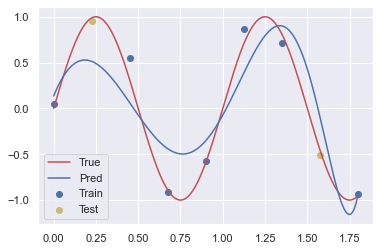

In [106]:
plt.plot(np.linspace(0, x_max, 1000), np.sin(2 * np.pi * np.linspace(0, x_max, 1000)), c='r', label='True')

space = np.array([
    np.linspace(0, x_max, 1000)**d for d in range(1, degree + 1)
]).transpose()
space = (space - means) / stds

plt.plot(np.linspace(0, x_max, 1000), space @ w + b, label='Pred')

plt.scatter(X_train, Y_train, c='b', label='Train')
plt.scatter(X_test, Y_test, c='y', label='Test')
plt.legend()
plt.show()

In [107]:
print_loss(X_train_deg, Y_train, w, b, 0, "Train")
print_loss(X_test_deg, Y_test, w, b, 0, "Test")

Train MSE: 0.112
Train loss: 0.112
------------------------------------------
Test MSE: 0.185
Test loss: 0.185
------------------------------------------


In [108]:
w

array([[  2.52152252],
       [-15.56986351],
       [ 15.84391958],
       [ 12.65821699],
       [ -1.31130136],
       [-10.56201264],
       [-11.73785008],
       [ -6.5913918 ],
       [  2.13948188],
       [ 12.22425002]])

#### Добавим регуляризацию

In [113]:
model = RegularizedLinearRegression(reg_coef=0.01)
w, b = model.fit(X_train_deg, Y_train, lr=0.1, num_epochs=100001)

Train MSE: 0.516
Train loss: 0.516
------------------------------------------
Train MSE: 0.221
Train loss: 0.231
------------------------------------------
Train MSE: 0.221
Train loss: 0.231
------------------------------------------
Train MSE: 0.221
Train loss: 0.231
------------------------------------------
Train MSE: 0.221
Train loss: 0.231
------------------------------------------
Train MSE: 0.221
Train loss: 0.231
------------------------------------------


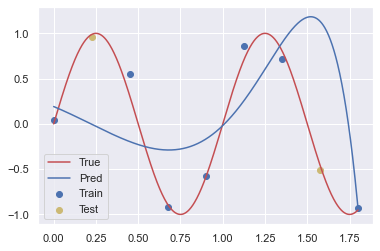

In [114]:
plt.plot(np.linspace(0, x_max, 1000), np.sin(2 * np.pi * np.linspace(0, x_max, 1000)), c='r', label='True')

space = np.array([
    np.linspace(0, x_max, 1000)**d for d in range(1, degree + 1)
]).transpose()
space = (space - means) / stds

plt.plot(np.linspace(0, x_max, 1000), space @ w + b, label='Pred')

plt.scatter(X_train, Y_train, c='b', label='Train')
plt.scatter(X_test, Y_test, c='y', label='Test')
plt.legend()
plt.show()

In [115]:
print_loss(X_train_deg, Y_train, w, b, 0, "Train")
print_loss(X_test_deg, Y_test, w, b, 0, "Test")

Train MSE: 0.221
Train loss: 0.221
------------------------------------------
Test MSE: 1.817
Test loss: 1.817
------------------------------------------


In [116]:
w

array([[-0.42769736],
       [-0.63530123],
       [ 1.40319357],
       [ 1.45435115],
       [ 0.66566409],
       [-0.10616453],
       [-0.58562446],
       [-0.7767247 ],
       [-0.76530203],
       [-0.63757195]])